# Data Wrangling
## 1. Import dataset

In [51]:
import pandas as pd
import numpy as np
from datetime import date

new_df = pd.read_csv('H_new_df.csv')
new_df.head()

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


## 2. Define functions and variables

In [53]:
quarter = {
            'Q1': [date(2011,1,1), date(2011,3,31)],
            'Q2': [date(2011,4,1), date(2011,6,30)],
            'Q3': [date(2011,7,1), date(2011,9,30)],
            'Q4': [date(2011,10,1), date(2011,12,31)],
            'Q4_2010': [date(2010,10,1), date(2010,12,31)],
          }

seasons = {
            'winter': [date(2010,12,1),date(2011,2,28)],
            'spring': [date(2011,3,1), date(2011,5,31)],
            'summer': [date(2011,6,1), date(2011,8,31)],
            'autumn': [date(2011,9,1), date(2011,11,30)],
          }

def set_quarter(invoice_date):
    if(invoice_date >= quarter['Q1'][0] and invoice_date <= quarter['Q1'][1]):
        return 'Q1'
    elif(invoice_date >= quarter['Q2'][0] and invoice_date <= quarter['Q2'][1]):
        return 'Q2'
    elif(invoice_date >= quarter['Q3'][0] and invoice_date <= quarter['Q3'][1]):
        return 'Q3'
    elif((invoice_date >= quarter['Q4'][0] and invoice_date <= quarter['Q4'][1]) or \
        (invoice_date >= quarter['Q4_2010'][0] and invoice_date <= quarter['Q4_2010'][1])):
        return 'Q4'

def set_season(invoice_date):
    if(invoice_date >= seasons['spring'][0] and invoice_date <= seasons['spring'][1]):
        return 'spring'
    elif(invoice_date >= seasons['summer'][0] and invoice_date <= seasons['summer'][1]):
        return 'summer'
    elif(invoice_date >= seasons['autumn'][0] and invoice_date <= seasons['autumn'][1]):
        return 'autumn'
    elif(invoice_date >= seasons['winter'][0] and invoice_date <= seasons['winter'][1]):
        return 'winter'

## 3. Make necessary columns

In [55]:
new_df['InvoiceDate'] = pd.to_datetime(new_df.InvoiceDate) # Convert invoicedate to datetime
new_df['Region'] = np.where(new_df['Country'].isin(['United Kingdom']), 'UK', 'Others') # Add region column
new_df['quarter'] = new_df['InvoiceDate'].map(set_quarter)
new_df['season'] = new_df['InvoiceDate'].map(set_season)
new_df.head()

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount,Region,quarter,season
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,UK,Q4,winter
1,1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,UK,Q4,winter
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,UK,Q4,winter
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,UK,Q4,winter
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,UK,Q4,winter


## 4. Filtering out 9 extra days from December 2011

In [57]:
new_df = new_df[(new_df['InvoiceDate'] >= '2010-12-1 00:00:00') & (new_df['InvoiceDate'] < '2011-12-1 00:00:00')]
print(new_df['InvoiceDate'].min(), new_df['InvoiceDate'].max())

2010-12-01 08:26:00 2011-11-30 17:37:00


## 5. Creating the description_category column

In [59]:
import re

pattern = re.compile(r'^.*?BAG.*?$')
list_of_matches = [x for x in new_df['Description'] if pattern.match(x)]
new_df['description_category'] = np.where(new_df['Description'].isin(list_of_matches), 'BAG', new_df['Description'])

pattern = re.compile(r'^.*?WRAP.*?$')
list_of_matches = [x for x in new_df['Description'] if pattern.match(x)]
new_df['description_category'] = np.where(new_df['Description'].isin(list_of_matches), 'WRAP', new_df['description_category'])

pattern = re.compile(r'^.*?CASES.*?$')
list_of_matches = [x for x in new_df['Description'] if pattern.match(x)]
new_df['description_category'] = np.where(new_df['Description'].isin(list_of_matches), 'CASES', new_df['description_category'])

pattern = re.compile(r'^.*?T-LIGHT.*?$')
list_of_matches = [x for x in new_df['Description'] if pattern.match(x)]
new_df['description_category'] = np.where(new_df['Description'].isin(list_of_matches), 'T-LIGHT', new_df['description_category'])

pattern = re.compile(r'^.*?BOTTLE.*?$')
list_of_matches = [x for x in new_df['Description'] if pattern.match(x)]
new_df['description_category'] = np.where(new_df['Description'].isin(list_of_matches), 'BOTTLE', new_df['description_category'])

pattern = re.compile(r'^.*?BUNTING.*?$')
list_of_matches = [x for x in new_df['Description'] if pattern.match(x)]
new_df['description_category'] = np.where(new_df['Description'].isin(list_of_matches), 'BUNTING', new_df['description_category'])

pattern = re.compile(r'^.*?CLOCK.*?$')
list_of_matches = [x for x in new_df['Description'] if pattern.match(x)]
new_df['description_category'] = np.where(new_df['Description'].isin(list_of_matches), 'CLOCK', new_df['description_category'])

pattern = re.compile(r'^.*?HAND WARMER.*?$')
list_of_matches = [x for x in new_df['Description'] if pattern.match(x)]
new_df['description_category'] = np.where(new_df['Description'].isin(list_of_matches), 'HAND WARMER', new_df['description_category'])

pattern = re.compile(r'^.*?CHALKBOARD.*?$')
list_of_matches = [x for x in new_df['Description'] if pattern.match(x)]
new_df['description_category'] = np.where(new_df['Description'].isin(list_of_matches), 'CHALKBOARD', new_df['description_category'])

pattern = re.compile(r'^.*?DOILY.*?$')
list_of_matches = [x for x in new_df['Description'] if pattern.match(x)]
new_df['description_category'] = np.where(new_df['Description'].isin(list_of_matches), 'DOILY', new_df['description_category'])

pattern = re.compile(r'^.*?CAKE.*?$')
list_of_matches = [x for x in new_df['Description'] if pattern.match(x)]
new_df['description_category'] = np.where(new_df['Description'].isin(list_of_matches), 'CAKE', new_df['description_category'])

pattern = re.compile(r'^.*?JAR.*?$')
list_of_matches = [x for x in new_df['Description'] if pattern.match(x)]
new_df['description_category'] = np.where(new_df['Description'].isin(list_of_matches), 'JAR', new_df['description_category'])

pattern = re.compile(r'^.*?ORNAMENT.*?$')
list_of_matches = [x for x in new_df['Description'] if pattern.match(x)]
new_df['description_category'] = np.where(new_df['Description'].isin(list_of_matches), 'ORNAMENT', new_df['description_category'])

pattern = re.compile(r'^.*?TISSUE.*?$')
list_of_matches = [x for x in new_df['Description'] if pattern.match(x)]
new_df['description_category'] = np.where(new_df['Description'].isin(list_of_matches), 'TISSUE', new_df['description_category'])

pattern = re.compile(r'^.*?SAUCER.*?$')
list_of_matches = [x for x in new_df['Description'] if pattern.match(x)]
new_df['description_category'] = np.where(new_df['Description'].isin(list_of_matches), 'SAUCER', new_df['description_category'])

pattern = re.compile(r'^.*?CANDLE.*?$')
list_of_matches = [x for x in new_df['Description'] if pattern.match(x)]
new_df['description_category'] = np.where(new_df['Description'].isin(list_of_matches), 'CANDLE', new_df['description_category'])

new_df.head(5)

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount,Region,quarter,season,description_category
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,UK,Q4,winter,T-LIGHT
1,1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,UK,Q4,winter,WHITE METAL LANTERN
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,UK,Q4,winter,CREAM CUPID HEARTS COAT HANGER
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,UK,Q4,winter,BOTTLE
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,UK,Q4,winter,RED WOOLLY HOTTIE WHITE HEART.


# Implementing Market Basket Analysis for Overall

In [ ]:
# new_df.groupby('Description')['Quantity'].sum().sort_values(ascending = False).head(20)

In [65]:
# new_df_30k = new_df.sample(n=30000, random_state=42)
# new_df_30k['Description'] = new_df_30k['Description'].str.replace('\d+', '')

# from sklearn.feature_extraction.text import CountVectorizer
# word_vectorizer = CountVectorizer(ngram_range=(2,2), analyzer='word')
# sparse_matrix = word_vectorizer.fit_transform(new_df_30k['Description'])
# frequencies = sum(sparse_matrix).toarray()[0]
# bigrams = pd.DataFrame(frequencies, index=word_vectorizer.get_feature_names(), columns=['frequency'])

# bigrams.sort_values(by=['frequency'], axis=0, ascending=False).head(20)

In [67]:
# new_df_30k = new_df.sample(n=30000, random_state=42)
# new_df_30k['description_category'] = new_df_30k['description_category'].str.replace('\d+', '')

# from sklearn.feature_extraction.text import CountVectorizer
# word_vectorizer = CountVectorizer(ngram_range=(2,2), analyzer='word')
# sparse_matrix = word_vectorizer.fit_transform(new_df_30k['description_category'])
# frequencies = sum(sparse_matrix).toarray()[0]
# bigrams = pd.DataFrame(frequencies, index=word_vectorizer.get_feature_names(), columns=['frequency'])

# bigrams.sort_values(by=['frequency'], axis=0, ascending=False).head(30)

In [69]:
# No of unique transactions
total_transactions = new_df['InvoiceNo'].nunique()
total_transactions

17754

In [71]:
# Check for product presence in every transaction/invoice
items = list(new_df['description_category'].unique())
grouped = new_df.groupby('InvoiceNo')
transaction_level = grouped.aggregate(lambda x: tuple(x)).reset_index()[['InvoiceNo','description_category']]
transaction_dict = {item:0 for item in items}
output_dict = dict()
temp = dict()
for rec in transaction_level.to_dict('records'):
    invoice_num = rec['InvoiceNo']
    items_list = rec['description_category']
    transaction_dict = {item:0 for item in items}
    transaction_dict.update({item:1 for item in items if item in items_list})
    temp.update({invoice_num:transaction_dict})

new = [v for k,v in temp.items()]
transaction_df = pd.DataFrame(new)

In [76]:
transaction_df_T = transaction_df.T
transaction_df_T['sum'] = transaction_df_T.sum(axis=1)
transaction_df_T = transaction_df_T.sort_values(by=['sum'], ascending=False)
transaction_df_T_copy = transaction_df_T.copy()
transaction_df_T_20 = transaction_df_T[:15]
transaction_df_T_20_no_drop = transaction_df_T_20.copy()
transaction_df_T_20 = transaction_df_T_20.drop(['sum'], axis=1)
trans = transaction_df_T_20.T
transaction_df_T_20_no_drop['share'] = transaction_df_T_20_no_drop['sum']/total_transactions
trans = trans.sample(n=500, random_state=42)

transaction_df_T_20_no_drop.head()

,0,1,2,3,4,5,6,7,8,9,...,5978,5979,5980,5981,5982,5983,5984,5985,sum,share
BAG,0,0,0,0,0,1,0,0,0,0,...,1,0,1,0,1,0,0,1,2500,0.140813
CAKE,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,1,2294,0.129210
T-LIGHT,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,1917,0.107976
BOTTLE,1,0,0,0,0,0,0,0,1,0,...,1,1,1,0,0,0,0,0,1858,0.104652
CANDLE,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,1,1,1392,0.078405


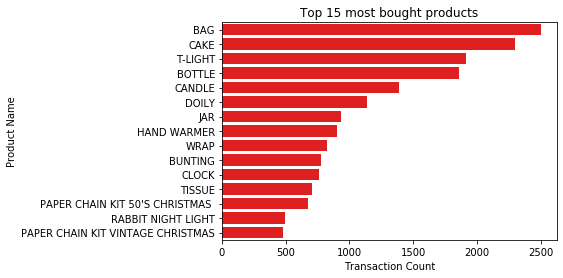

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(y = transaction_df_T_20_no_drop.index.values, x = transaction_df_T_20_no_drop['sum'].values, color = 'red')
# sns.barplot(y = transaction_df_T_20_no_drop.index.values, x = transaction_df_T_20_no_drop['share'].values, color = 'red')
plt.title('Top 15 most bought products')
plt.xlabel('Transaction Count')
plt.ylabel('Product Name')
plt.show()

In [79]:
new_df2 = new_df.copy()
new_df2 = new_df2[new_df2['description_category'].isin(['BAG', 'CAKE' 'T-LIGHT', 'BUNTING', 'CANDLE', 'JAR', 'BOTTLE', 'DOILY', 'WRAP', 'CLOCK'])]
new_df2.head()

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount,Region,quarter,season,description_category,spend
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,UK,Q4,winter,BOTTLE,20.34
21,21,536368,22960,JAM MAKING SET WITH JARS,6,2010-12-01 08:34:00,4.25,13047,United Kingdom,25.50,UK,Q4,winter,JAR,25.50
26,26,536370,22728,ALARM CLOCK BAKELIKE PINK,24,2010-12-01 08:45:00,3.75,12583,France,90.00,Others,Q4,winter,CLOCK,90.00
27,27,536370,22727,ALARM CLOCK BAKELIKE RED,24,2010-12-01 08:45:00,3.75,12583,France,90.00,Others,Q4,winter,CLOCK,90.00
28,28,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,2010-12-01 08:45:00,3.75,12583,France,45.00,Others,Q4,winter,CLOCK,45.00


In [80]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.frequent_patterns import association_rules

frequent_itemsets_ap = apriori(trans, min_support=0.01, use_colnames=True)
frequent_itemsets_fp = fpgrowth(trans, min_support=0.01, use_colnames=True)

rules_ap = association_rules(frequent_itemsets_ap, metric="confidence", min_threshold=0.001)
rules_fp = association_rules(frequent_itemsets_fp, metric="confidence", min_threshold=0.001)

In [81]:
tmp = rules_ap \
        [['antecedents', 'consequents', 'confidence', 'lift']].sort_values(by = ['lift', 'confidence'], axis = 0, ascending = False)
# tmp['rule'] = (str(tmp['antecedents']) + ' + ' + str(tmp['consequents']))[4:]
tmp

,antecedents,consequents,confidence,lift
24436,"(CANDLE, CAKE, BUNTING, T-LIGHT)","(BAG, TISSUE, JAR)",0.416667,23.148148
24481,"(BAG, TISSUE, JAR)","(CANDLE, CAKE, BUNTING, T-LIGHT)",0.555556,23.148148
25122,"(CANDLE, HAND WARMER, DOILY, T-LIGHT)","(BOTTLE, BAG, CAKE, JAR)",0.750000,22.058824
25183,"(BOTTLE, BAG, CAKE, JAR)","(CANDLE, HAND WARMER, DOILY, T-LIGHT)",0.352941,22.058824
25188,"(CANDLE, HAND WARMER, DOILY)","(BAG, BOTTLE, CAKE, JAR, T-LIGHT)",0.545455,20.979021
...,...,...,...,...
154,(HAND WARMER),(WRAP),0.114943,0.957854
1728,"(BOTTLE, HAND WARMER)",(WRAP),0.103448,0.862069
1733,(WRAP),"(BOTTLE, HAND WARMER)",0.100000,0.862069
148,(PAPER CHAIN KIT 50'S CHRISTMAS ),(JAR),0.092593,0.564589


In [82]:
new_df['spend'] = new_df['UnitPrice'] * new_df['Quantity']
new_df.groupby('InvoiceNo')['spend'].sum().sort_values(ascending = False).head(20)

InvoiceNo
541431    77183.60
556444    38970.00
567423    31698.16
556917    22775.93
572209    22206.00
567381    22104.80
563614    21880.44
550461    21535.90
572035    20277.92
563076    19150.66
562439    18841.48
541220    16774.72
545475    16726.84
556255    16488.00
537659    15885.49
548011    15719.56
569650    15643.77
540815    15160.90
552883    14415.74
543989    14022.92
Name: spend, dtype: float64

# Implementing Market Basket Analysis per quarter
## Q4

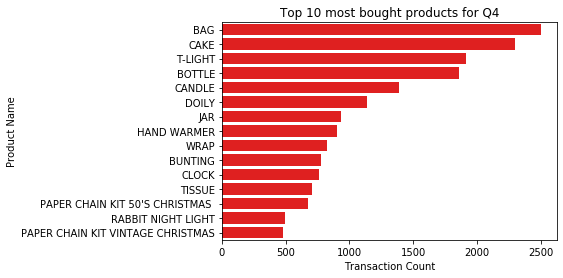

In [73]:
df_q4 = new_df[new_df['quarter'] == 'Q4']

items = list(df_q4['description_category'].unique())
grouped = df_q4.groupby('InvoiceNo')
transaction_level = grouped.aggregate(lambda x: tuple(x)).reset_index()[['InvoiceNo','description_category']]
transaction_dict = {item:0 for item in items}
output_dict = dict()
temp = dict()
for rec in transaction_level.to_dict('records'):
    invoice_num = rec['InvoiceNo']
    items_list = rec['description_category']
    transaction_dict = {item:0 for item in items}
    transaction_dict.update({item:1 for item in items if item in items_list})
    temp.update({invoice_num:transaction_dict})

new = [v for k,v in temp.items()]
transaction_df = pd.DataFrame(new)

transaction_df_T = transaction_df.T
transaction_df_T['sum'] = transaction_df_T.sum(axis=1)
transaction_df_T = transaction_df_T.sort_values(by=['sum'], ascending=False)
transaction_df_T_copy = transaction_df_T.copy()
transaction_df_T_20 = transaction_df_T[:15]
transaction_df_T_20_no_drop = transaction_df_T_20.copy()
transaction_df_T_20 = transaction_df_T_20.drop(['sum'], axis=1)
trans = transaction_df_T_20.T
transaction_df_T_20_no_drop['share'] = transaction_df_T_20_no_drop['sum']/total_transactions
trans = trans.sample(n=500, random_state=42)

import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(y = transaction_df_T_20_no_drop.index.values, x = transaction_df_T_20_no_drop['sum'].values, color = 'red')
# sns.barplot(y = transaction_df_T_20_no_drop.index.values, x = transaction_df_T_20_no_drop['share'].values, color = 'red')
plt.title('Top 10 most bought products for Q4')
plt.xlabel('Transaction Count')
plt.ylabel('Product Name')
plt.show()

In [74]:
df_q4_2 = df_q4.copy()
df_q4_2 = df_q4_2[df_q4_2['description_category'].isin(['BAG', 'CAKE' 'T-LIGHT', 'BUNTING', 'CANDLE', 'JAR', 'BOTTLE', 'DOILY', 'WRAP', 'CLOCK'])]
df_q4_2.head()

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount,Region,quarter,season,description_category
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,UK,Q4,winter,BOTTLE
21,21,536368,22960,JAM MAKING SET WITH JARS,6,2010-12-01 08:34:00,4.25,13047,United Kingdom,25.50,UK,Q4,winter,JAR
26,26,536370,22728,ALARM CLOCK BAKELIKE PINK,24,2010-12-01 08:45:00,3.75,12583,France,90.00,Others,Q4,winter,CLOCK
27,27,536370,22727,ALARM CLOCK BAKELIKE RED,24,2010-12-01 08:45:00,3.75,12583,France,90.00,Others,Q4,winter,CLOCK
28,28,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,2010-12-01 08:45:00,3.75,12583,France,45.00,Others,Q4,winter,CLOCK


In [75]:
frequent_itemsets_ap = apriori(trans, min_support=0.01, use_colnames=True)
frequent_itemsets_fp = fpgrowth(trans, min_support=0.01, use_colnames=True)

rules_ap = association_rules(frequent_itemsets_ap, metric="confidence", min_threshold=0.001)
rules_fp = association_rules(frequent_itemsets_fp, metric="confidence", min_threshold=0.001)

tmp = rules_ap \
        [['antecedents', 'consequents', 'confidence', 'lift']].sort_values(by = ['lift', 'confidence'], axis = 0, ascending = False)
# tmp['rule'] = (str(tmp['antecedents']) + ' + ' + str(tmp['consequents']))[4:]
tmp

,antecedents,consequents,confidence,lift
24436,"(CANDLE, CAKE, BUNTING, T-LIGHT)","(BAG, TISSUE, JAR)",0.416667,23.148148
24481,"(BAG, TISSUE, JAR)","(CANDLE, CAKE, BUNTING, T-LIGHT)",0.555556,23.148148
25122,"(CANDLE, HAND WARMER, DOILY, T-LIGHT)","(BOTTLE, BAG, CAKE, JAR)",0.750000,22.058824
25183,"(BOTTLE, BAG, CAKE, JAR)","(CANDLE, HAND WARMER, DOILY, T-LIGHT)",0.352941,22.058824
25188,"(CANDLE, HAND WARMER, DOILY)","(BAG, BOTTLE, CAKE, JAR, T-LIGHT)",0.545455,20.979021
...,...,...,...,...
154,(HAND WARMER),(WRAP),0.114943,0.957854
1728,"(BOTTLE, HAND WARMER)",(WRAP),0.103448,0.862069
1733,(WRAP),"(BOTTLE, HAND WARMER)",0.100000,0.862069
148,(PAPER CHAIN KIT 50'S CHRISTMAS ),(JAR),0.092593,0.564589


## Q3

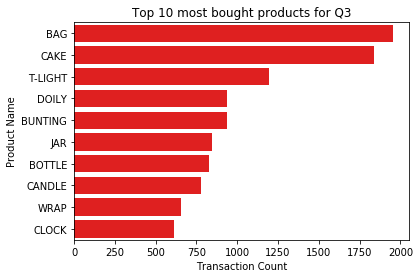

In [231]:
df_q3 = new_df[new_df['quarter'] == 'Q3']

items = list(df_q3['description_category'].unique())
grouped = df_q3.groupby('InvoiceNo')
transaction_level = grouped.aggregate(lambda x: tuple(x)).reset_index()[['InvoiceNo','description_category']]
transaction_dict = {item:0 for item in items}
output_dict = dict()
temp = dict()
for rec in transaction_level.to_dict('records'):
    invoice_num = rec['InvoiceNo']
    items_list = rec['description_category']
    transaction_dict = {item:0 for item in items}
    transaction_dict.update({item:1 for item in items if item in items_list})
    temp.update({invoice_num:transaction_dict})

new = [v for k,v in temp.items()]
transaction_df = pd.DataFrame(new)

transaction_df_T = transaction_df.T
transaction_df_T['sum'] = transaction_df_T.sum(axis=1)
transaction_df_T = transaction_df_T.sort_values(by=['sum'], ascending=False)
transaction_df_T_copy = transaction_df_T.copy()
transaction_df_T_20 = transaction_df_T[:10]
transaction_df_T_20_no_drop = transaction_df_T_20.copy()
transaction_df_T_20 = transaction_df_T_20.drop(['sum'], axis=1)
trans = transaction_df_T_20.T
transaction_df_T_20_no_drop['share'] = transaction_df_T_20_no_drop['sum']/total_transactions
trans = trans.sample(n=500, random_state=42)

import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(y = transaction_df_T_20_no_drop.index.values, x = transaction_df_T_20_no_drop['sum'].values, color = 'red')
# sns.barplot(y = transaction_df_T_20_no_drop.index.values, x = transaction_df_T_20_no_drop['share'].values, color = 'red')
plt.title('Top 10 most bought products for Q3')
plt.xlabel('Transaction Count')
plt.ylabel('Product Name')
plt.show()

In [232]:
df_q3_2 = df_q3.copy()
df_q3_2 = df_q3_2[df_q3_2['description_category'].isin(['BAG', 'CAKE' 'T-LIGHT', 'BUNTING', 'CANDLE', 'JAR', 'BOTTLE', 'DOILY', 'WRAP', 'CLOCK'])]
df_q3_2.head()

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount,Region,quarter,season,description_category
172636,172636,558638,71459,HANGING JAM JAR T-LIGHT HOLDER,24,2011-07-01 08:16:00,0.85,16317,United Kingdom,20.4,UK,Q3,summer,JAR
172642,172642,558638,22726,ALARM CLOCK BAKELIKE GREEN,4,2011-07-01 08:16:00,3.75,16317,United Kingdom,15.0,UK,Q3,summer,CLOCK
172655,172655,558638,23240,SET OF 4 KNICK KNACK TINS DOILY,6,2011-07-01 08:16:00,4.15,16317,United Kingdom,24.9,UK,Q3,summer,DOILY
172656,172656,558638,23233,WRAP POPPIES DESIGN,50,2011-07-01 08:16:00,0.42,16317,United Kingdom,21.0,UK,Q3,summer,WRAP
172664,172664,558639,21936,RED RETROSPOT PICNIC BAG,10,2011-07-01 08:55:00,2.95,13492,Switzerland,29.5,Others,Q3,summer,BAG


In [234]:
frequent_itemsets_ap = apriori(trans, min_support=0.01, use_colnames=True)
frequent_itemsets_fp = fpgrowth(trans, min_support=0.01, use_colnames=True)

rules_ap = association_rules(frequent_itemsets_ap, metric="confidence", min_threshold=0.001)
rules_fp = association_rules(frequent_itemsets_fp, metric="confidence", min_threshold=0.001)

tmp = rules_ap \
        [['antecedents', 'consequents', 'confidence', 'lift']].sort_values(by = ['lift', 'confidence'], axis = 0, ascending = False)
# tmp['rule'] = (str(tmp['antecedents']) + ' + ' + str(tmp['consequents']))[4:]
tmp

,antecedents,consequents,confidence,lift
5402,"(BAG, CANDLE, CLOCK)","(CAKE, BOTTLE, T-LIGHT)",0.625000,18.382353
5391,"(CAKE, BOTTLE, T-LIGHT)","(BAG, CANDLE, CLOCK)",0.294118,18.382353
5384,"(BAG, CAKE, CANDLE, CLOCK)","(BOTTLE, T-LIGHT)",0.833333,16.666667
5409,"(BOTTLE, T-LIGHT)","(BAG, CAKE, CANDLE, CLOCK)",0.200000,16.666667
5398,"(CAKE, CANDLE, CLOCK)","(BAG, BOTTLE, T-LIGHT)",0.555556,15.432099
...,...,...,...,...
517,"(BOTTLE, T-LIGHT)",(BUNTING),0.200000,0.961538
63,(BUNTING),(BOTTLE),0.144231,0.924556
62,(BOTTLE),(BUNTING),0.192308,0.924556
518,"(BUNTING, T-LIGHT)",(BOTTLE),0.128205,0.821828
